In [ ]:
import numpy as np
import pandas as pd

import io
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
iploaded = files.upload()

Saving titanic.csv to titanic.csv


In [ ]:
df = pd.read_csv(io.BytesIO(iploaded['titanic.csv']),usecols=['Age','Fare','Survived'])

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
# check for the missing values
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [ ]:
X= df.drop(columns= ['Survived'])
y= df['Survived']

In [ ]:
# almost 20 % data is missing in the Age columns so impute the value for the age column
# split the data
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size= 0.2 , random_state= 4)

In [ ]:
# add the columns for the imputation
X_train['Age_imputed'] = X_train['Age']

X_test['Age_imputed'] = X_test['Age']

In [ ]:
# now impute the missing values at random in new age imputed column
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] # all the values with the null values

42    NaN
409   NaN
740   NaN
214   NaN
413   NaN
       ..
533   NaN
564   NaN
126   NaN
109   NaN
709   NaN
Name: Age_imputed, Length: 142, dtype: float64

In [ ]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values # Random values foe the all the mssing values

array([27.  , 45.5 , 48.  , 18.  , 25.  , 35.  , 28.  , 27.  , 36.  ,
       19.  , 59.  , 33.  , 40.  , 43.  , 18.  , 48.  ,  0.83, 29.  ,
       19.  , 70.  , 35.  , 28.  ,  8.  , 44.  , 60.  , 48.  , 21.  ,
       22.  , 28.  ,  0.42, 58.  , 27.  , 30.  , 26.  , 39.  , 62.  ,
       18.  , 48.  , 30.  ,  2.  , 64.  , 32.5 , 19.  , 30.  , 30.5 ,
       23.  , 60.  , 35.  , 35.  , 34.  , 31.  , 39.  , 29.  , 17.  ,
       26.  , 26.  , 16.  , 48.  , 18.  , 40.  , 33.  , 63.  , 43.  ,
       29.  , 31.  , 52.  ,  6.  , 28.  , 17.  , 35.  , 25.  , 19.  ,
       22.  , 25.  , 30.  , 30.  , 29.  ,  2.  ,  2.  , 21.  , 29.  ,
       21.  , 63.  , 25.  , 28.5 , 34.  , 26.  , 20.  , 51.  , 34.  ,
       30.  , 35.  ,  0.83, 26.  , 18.  , 22.  , 18.  , 42.  ,  1.  ,
       45.  , 25.  ,  9.  ,  1.  , 33.  , 23.  , 24.  ,  3.  , 31.  ,
       23.  , 48.  , 50.  , 28.  , 19.  , 23.  , 49.  , 20.  , 23.  ,
       30.  , 14.  , 28.  , 18.  , 28.  ,  5.  , 40.  , 28.  , 19.  ,
       38.  , 22.  ,

In [ ]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

In [ ]:
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [ ]:
X_train['Age_imputed'].isnull().sum() # no missing values

0

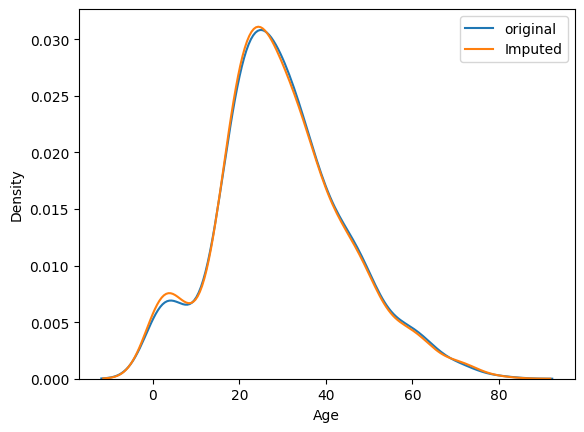

In [ ]:
# now lets plot and see the differnece between imputed and the original age columns
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(X_train['Age'] , label = "original" )
sns.kdeplot(X_train['Age_imputed'], label="Imputed")

plt.legend()
plt.show()

# Conclusion there is no big differnce between imputed and original column so we can use this tranformation for the Linear model

In [ ]:
# Lets check the covarince
print("The original covarience", X_train['Age'].var())
print("The  imputed covarience", X_train['Age_imputed'].var())


# there in no big differnce in covarince

The original covarience 212.94777780686337
The  imputed covarience 216.01194566582117


In [ ]:
# Correlation chekcing
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2782.831689,53.997398,46.748668
Age,53.997398,212.947778,212.947778
Age_imputed,46.748668,212.947778,216.011946


# Observation : there is the big differnce between coverience in the calculated and the original column this might impact on model like *Decision Tree*

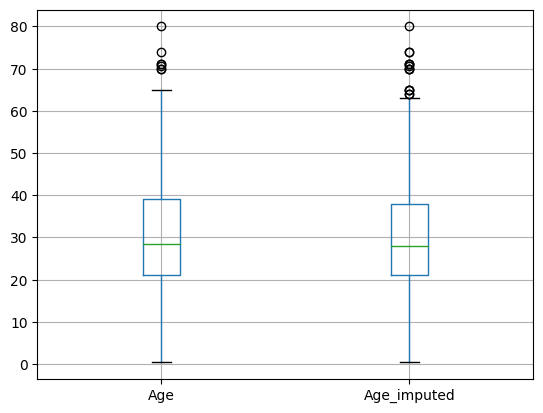

In [ ]:
X_train[['Age','Age_imputed']].boxplot()
plt.show()

# Observation : there in no change in outlier after and before transformation

In [ ]:
# To make sure that if we input same data multiple time it should also give the same random value
 # sampled_value = X_train['Age'].dropna().sample(1, random_state=int(['Fare']))

# Categorical data imputation by random sample imputation

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving garage_data.csv to garage_data.csv


In [ ]:
df1 = pd.read_csv(io.BytesIO(uploaded['garage_data.csv']),usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [ ]:
df1.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [ ]:
# check the missing values percentage
df1.isnull().mean()

FireplaceQu    0.472603
GarageQual     0.055479
SalePrice      0.000000
dtype: float64

In [ ]:
# train test split
X = df1.drop(columns= ['SalePrice'])
y= df1['SalePrice']

In [ ]:
# split it
X['FireplaceQu_imputed'] = X['FireplaceQu']
X['GarageQual_imputed'] = X['GarageQual']

In [ ]:
X_train,X_test , y_train,y_test = train_test_split(X,y,test_size= 0.2 , random_state= 4)

In [ ]:
# now compute the values fir the missing values
X_train['FireplaceQu_imputed'][X_train['FireplaceQu'].isnull()] # all the values with null

155    NaN
901    NaN
723    NaN
728    NaN
833    NaN
      ... 
951    NaN
818    NaN
456    NaN
709    NaN
439    NaN
Name: FireplaceQu_imputed, Length: 561, dtype: object

In [ ]:

X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values

array(['Gd', 'Gd', 'TA', 'Gd', 'Gd', 'TA', 'Gd', 'TA', 'Gd', 'Gd', 'Gd',
       'Po', 'TA', 'TA', 'Gd', 'Gd', 'TA', 'Gd', 'Gd', 'Gd', 'TA', 'Gd',
       'Gd', 'TA', 'TA', 'Gd', 'TA', 'Fa', 'TA', 'Gd', 'Gd', 'Gd', 'Gd',
       'TA', 'Gd', 'TA', 'Gd', 'Gd', 'Gd', 'Gd', 'Fa', 'Gd', 'TA', 'TA',
       'TA', 'Gd', 'Gd', 'Gd', 'Gd', 'Gd', 'Gd', 'Gd', 'Fa', 'Gd', 'Gd',
       'Gd', 'Gd', 'Gd', 'Po', 'Fa', 'Gd', 'Gd', 'Gd', 'TA', 'Gd', 'Gd',
       'Gd', 'TA', 'Fa', 'Gd', 'TA', 'TA', 'Ex', 'TA', 'TA', 'Gd', 'TA',
       'Gd', 'Gd', 'Gd', 'Fa', 'TA', 'Gd', 'TA', 'TA', 'Gd', 'Gd', 'Gd',
       'TA', 'TA', 'Gd', 'Gd', 'TA', 'TA', 'TA', 'TA', 'Gd', 'Gd', 'Gd',
       'TA', 'TA', 'TA', 'TA', 'Gd', 'Gd', 'Po', 'TA', 'Gd', 'TA', 'Gd',
       'TA', 'TA', 'Fa', 'TA', 'Gd', 'TA', 'Gd', 'Gd', 'Gd', 'Po', 'TA',
       'TA', 'Gd', 'TA', 'Gd', 'TA', 'Gd', 'TA', 'TA', 'TA', 'TA', 'TA',
       'Gd', 'Po', 'TA', 'TA', 'Gd', 'Fa', 'TA', 'Po', 'TA', 'TA', 'TA',
       'Gd', 'TA', 'Gd', 'Gd', 'Gd', 'TA', 'TA', 'F

In [ ]:
X_train['FireplaceQu_imputed'][X_train['FireplaceQu'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu'].isnull()] = X_test['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

In [ ]:
X_train['GarageQual_imputed'][X_train['GarageQual'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual'].isnull()] = X_test['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

In [ ]:

temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [ ]:
temp

,original,imputed
TA,0.951686,0.951199
Fa,0.033728,0.034247
Gd,0.009116,0.008562
Po,0.002735,0.003425
Ex,0.002735,0.002568


In [ ]:
# for category in X_train['FireplaceQu'].dropna().unique():
#     sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
# plt.show()